<a href="https://colab.research.google.com/github/Naif-Ganadily/Thyroid_Disease_Classification/blob/main/Thyroid_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thyroid Disease Classification**

---



# About Dataset

---

### Context
The datasets featured below were created by reconciling [thyroid disease datasets](https://archive.ics.uci.edu/ml/datasets/thyroid+disease) provided by the UCI Machine Learning Repository.

### Content
The sizes for all files featured within this Kaggle dataset are shown below — along with a list of attributes, and their description summaries, for each of the files:

* **all_conditions.csv** - 2800 observations x 35 attributes
* **all_conditions_test.csv** - 2800 observations x 35 attributes
* **all_thyroid.csv** - 2800 observations x 35 attributes
* **all_thyroid_test.csv** - 2800 observations x 35 attributes
* **age** - age of the patient (int)
* **sex** - sex patient identifies (str)
* **on_thyroxine** - whether patient is on thyroxine (bool)
* **query on thyroxine** - *whether patient is on thyroxine (bool)
* **on antithyroid meds** - whether patient is on antithyroid meds (bool)
* **sick** - whether patient is sick (bool)
* **pregnant** - whether patient is pregnant (bool)
* **thyroid_surgery** - whether patient has undergone thyroid surgery (bool)
* **I131_treatment** - whether patient is undergoing I131 treatment (bool)
* **query_hypothyroid** - whether patient believes they have hypothyroid (bool)
* **query_hyperthyroid** - whether patient believes they have hyperthyroid (bool)
* **lithium** - whether patient * lithium (bool)
* **goitre** - whether patient has goitre (bool)
* **tumor** - whether patient has tumor (bool)
* **hypopituitary** - whether patient * hyperpituitary gland (float)
* **psych** - whether patient * psych (bool)
* **TSH_measured** - whether TSH was measured in the blood (bool)
* **TSH** - TSH level in blood from lab work (float)
* **T3_measured** - whether T3 was measured in the blood (bool)
* **T3** - T3 level in blood from lab work (float)
* **TT4_measured** - whether TT4 was measured in the blood (bool)
* **TT4** - TT4 level in blood from lab work (float)
* **T4U_measured** - whether T4U was measured in the blood (bool)
* **T4U** - T4U level in blood from lab work (float)
* **FTI_measured** - whether FTI was measured in the blood (bool)
* **FTI** - FTI level in blood from lab work (float)
* **TBG_measured** - whether TBG was measured in the blood (bool)
* **TBG** - TBG level in blood from lab work (float)
* **referral_source** - (str)
* **patient_id** - unique id of the patient (str)
* **target_hyper** - hyperthyroidism medical diagnosis (str)
* **target_hypo** - hypothyroidism medical diagnosis (str)
* **target_bp** - binding protein medical diagnosis (str)
* **target_rep** - type of replacement therapy ongoing (str)
* **target_sick** - whether patient is sick or not (str)
   



We will do the following things:
*   Data Analysis
*   Feature Engineering
*   Satandardization
*   Model Building
*   Predictions



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects/Thyroid Disease Predictor/all_thyroid.csv")

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.14,t,109.0,f,NaN,SVHC,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120.0,f,NaN,other,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70.0,f,NaN,SVI,2807,negative,negative


In [5]:
df_test= pd.read_csv("/content/drive/MyDrive/ML Projects/Thyroid Disease Predictor/all_thyroid_test.csv")

In [6]:
df_test.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo
0,35,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,219,negative,negative
1,63,M,f,f,f,f,f,f,f,f,...,t,0.96,t,113.0,f,NaN,SVI,2059,negative,negative
2,25,F,f,f,f,f,f,f,f,f,...,t,0.82,t,75.0,f,NaN,SVHD,399,negative,negative
3,53,F,f,f,f,f,f,f,f,t,...,t,1.03,t,141.0,f,NaN,other,1911,negative,negative
4,92,F,f,f,f,f,f,f,f,f,...,t,0.84,t,143.0,f,NaN,SVI,487,negative,negative


In [7]:
df.shape

(2800, 32)

In [8]:
df.isnull().sum()

age                       1
sex                     110
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     284
T3_measured               0
T3                      585
TT4_measured              0
TT4                     184
T4U_measured              0
T4U                     297
FTI_measured              0
FTI                     295
TBG_measured              0
TBG                    2800
referral_source           0
patient_id                0
target_hyper              0
target_hypo               0
dtype: int64

In [9]:
df.isnull().sum().sum()

4556

In [10]:
df2 = df
df2.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.14,t,109.0,f,NaN,SVHC,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120.0,f,NaN,other,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70.0,f,NaN,SVI,2807,negative,negative


In [11]:
df2.isnull().sum()

age                       1
sex                     110
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     284
T3_measured               0
T3                      585
TT4_measured              0
TT4                     184
T4U_measured              0
T4U                     297
FTI_measured              0
FTI                     295
TBG_measured              0
TBG                    2800
referral_source           0
patient_id                0
target_hyper              0
target_hypo               0
dtype: int64

In [12]:
df2.isnull().sum().sum()

4556

In [13]:
df2.drop(['TBG', 'TBG_measured'], axis=1, inplace=True)

In [14]:
df2.isnull().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    284
T3_measured              0
T3                     585
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                    297
FTI_measured             0
FTI                    295
referral_source          0
patient_id               0
target_hyper             0
target_hypo              0
dtype: int64

In [15]:
df2['FTI'] = df2['FTI'].fillna(0)

In [16]:
df2.isnull().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    284
T3_measured              0
T3                     585
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                    297
FTI_measured             0
FTI                      0
referral_source          0
patient_id               0
target_hyper             0
target_hypo              0
dtype: int64

In [19]:
df2['T4U'] = df2['T4U'].fillna(0)
df2['T3'] = df2['T3'].fillna(0)
df2['TSH'] = df2['TSH'].fillna(0)
df2.isnull().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                      0
T3_measured              0
T3                       0
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                      0
FTI_measured             0
FTI                      0
referral_source          0
patient_id               0
target_hyper             0
target_hypo              0
dtype: int64

In [21]:
df2['TT4'] = df2['TT4'].fillna(0)
df2.isnull().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                      0
T3_measured              0
T3                       0
TT4_measured             0
TT4                      0
T4U_measured             0
T4U                      0
FTI_measured             0
FTI                      0
referral_source          0
patient_id               0
target_hyper             0
target_hypo              0
dtype: int64

In [22]:
df2.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,patient_id,target_hyper,target_hypo
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,SVHC,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,other,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,other,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,other,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,SVI,2807,negative,negative


In [24]:
df.dropna(subset=['sex'])
df2.isnull().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                      0
T3_measured              0
T3                       0
TT4_measured             0
TT4                      0
T4U_measured             0
T4U                      0
FTI_measured             0
FTI                      0
referral_source          0
patient_id               0
target_hyper             0
target_hypo              0
dtype: int64

In [25]:
df2.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,patient_id,target_hyper,target_hypo
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,SVHC,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,other,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,other,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,other,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,SVI,2807,negative,negative


In [28]:
df2.tail(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,patient_id,target_hyper,target_hypo
2780,49.0,F,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,other,454,negative,negative
2781,72.0,F,f,f,f,f,f,f,f,f,...,t,87.0,t,0.93,t,93.0,other,3681,negative,negative
2782,50.0,F,f,f,f,f,f,f,f,t,...,t,98.0,t,0.80,t,122.0,SVI,1691,negative,negative
2783,82.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,0.84,t,149.0,other,2985,negative,negative
2784,27.0,F,f,f,f,f,f,f,f,f,...,t,104.0,f,0.00,f,0.0,other,66,negative,negative
2785,57.0,M,f,f,f,t,f,f,f,f,...,t,73.0,t,0.97,t,75.0,SVI,182,negative,negative
2786,73.0,NaN,f,f,f,f,f,f,f,f,...,t,173.0,t,1.00,t,173.0,other,2431,hyperthyroid,negative
2787,58.0,M,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,other,3214,negative,negative
2788,70.0,M,f,f,f,f,f,f,f,f,...,t,70.0,t,0.77,t,91.0,SVI,2979,negative,negative
2789,54.0,F,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,other,451,negative,negative


In [29]:
df2 = df2[df2['sex'].notna()]

In [30]:
df2.tail(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,patient_id,target_hyper,target_hypo
2776,79.0,M,f,f,f,f,f,f,f,f,...,t,116.0,t,0.85,t,137.0,SVI,932,negative,negative
2778,52.0,F,f,f,f,f,f,t,f,f,...,t,80.0,t,0.82,t,98.0,other,691,negative,negative
2780,49.0,F,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,other,454,negative,negative
2781,72.0,F,f,f,f,f,f,f,f,f,...,t,87.0,t,0.93,t,93.0,other,3681,negative,negative
2782,50.0,F,f,f,f,f,f,f,f,t,...,t,98.0,t,0.80,t,122.0,SVI,1691,negative,negative
2783,82.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,0.84,t,149.0,other,2985,negative,negative
2784,27.0,F,f,f,f,f,f,f,f,f,...,t,104.0,f,0.00,f,0.0,other,66,negative,negative
2785,57.0,M,f,f,f,t,f,f,f,f,...,t,73.0,t,0.97,t,75.0,SVI,182,negative,negative
2787,58.0,M,f,f,f,f,f,f,f,f,...,f,0.0,f,0.00,f,0.0,other,3214,negative,negative
2788,70.0,M,f,f,f,f,f,f,f,f,...,t,70.0,t,0.77,t,91.0,SVI,2979,negative,negative


In [31]:
df2.isnull().sum()

age                    1
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
referral_source        0
patient_id             0
target_hyper           0
target_hypo            0
dtype: int64

In [32]:
df2 = df2[df2['age'].notna()]

In [33]:
df2.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
referral_source        0
patient_id             0
target_hyper           0
target_hypo            0
dtype: int64

In [34]:
df2.isnull().sum().sum()

0

## Now we have no NaN and or Null Values we can continue with our Analysis

In [35]:
df2.corr()

,age,TSH,T3,TT4,T4U,FTI,patient_id
age,1.000000,-0.030995,-0.090007,0.000305,-0.003839,0.091175,-0.044430
TSH,-0.030995,1.000000,-0.085979,-0.174556,0.062159,-0.175359,0.062791
T3,-0.090007,-0.085979,1.000000,0.442000,0.333302,0.280734,-0.107936
TT4,0.000305,-0.174556,0.442000,1.000000,0.599154,0.778732,0.069133
T4U,-0.003839,0.062159,0.333302,0.599154,1.000000,0.571037,0.030334
FTI,0.091175,-0.175359,0.280734,0.778732,0.571037,1.000000,0.071962
patient_id,-0.044430,0.062791,-0.107936,0.069133,0.030334,0.071962,1.000000


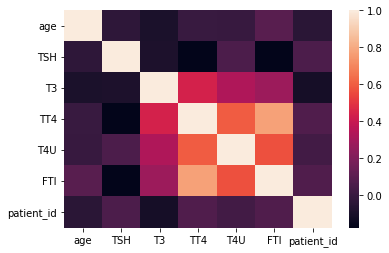

In [36]:
sns.heatmap(df2.corr())

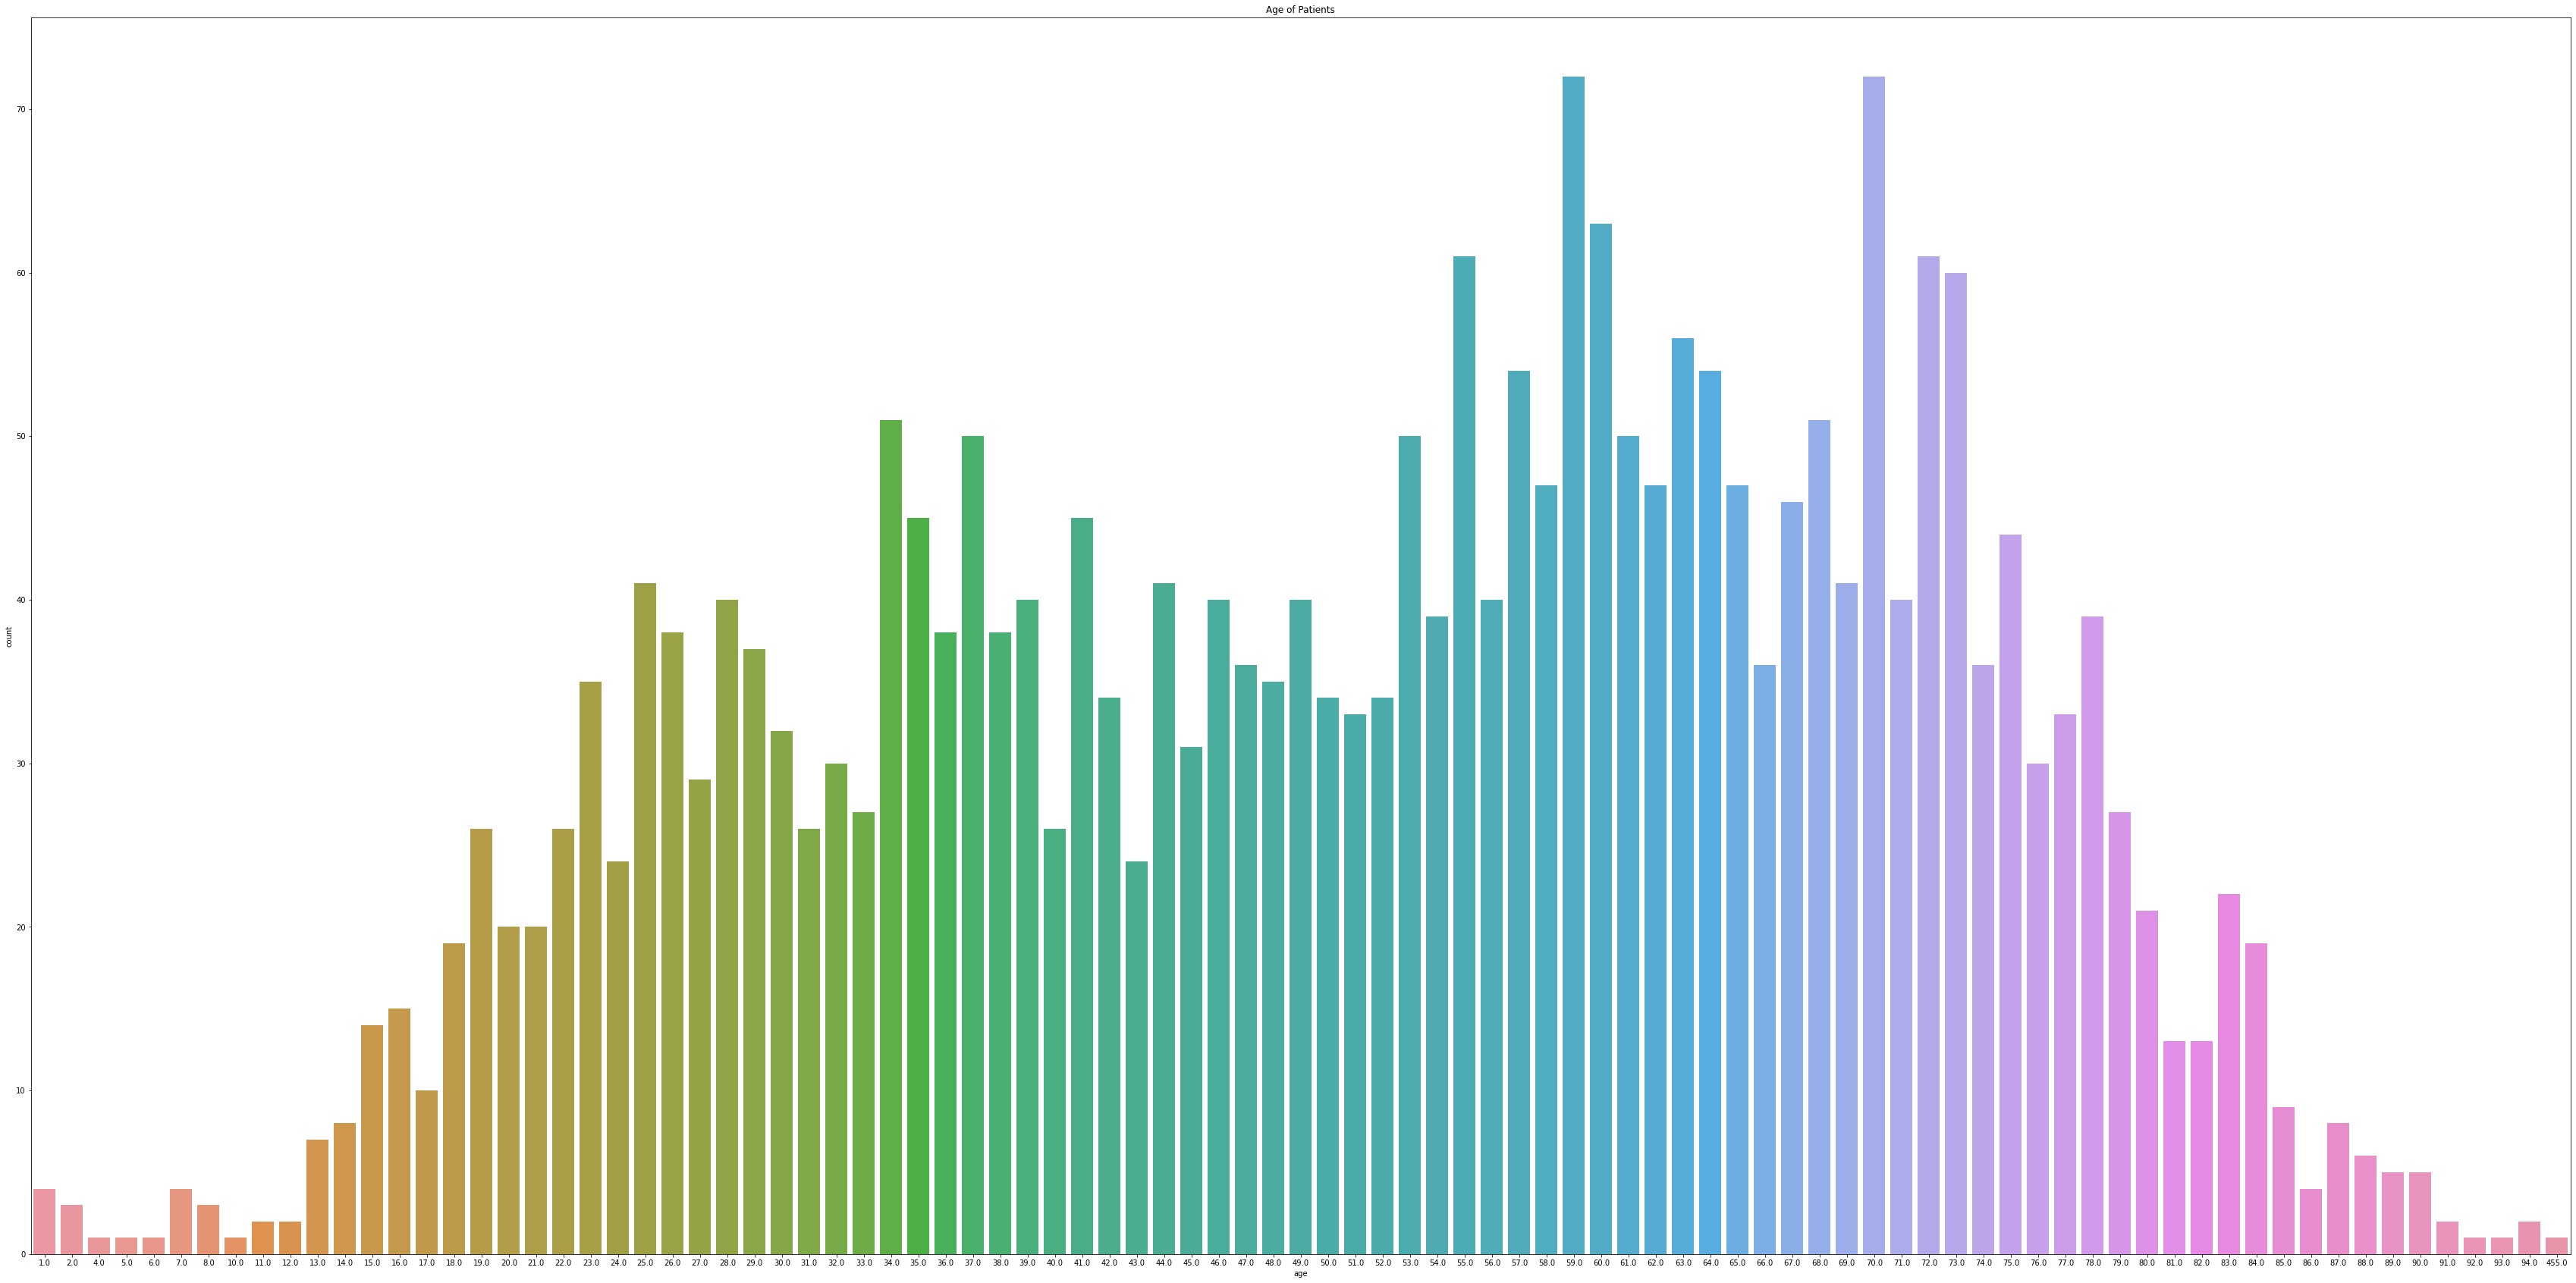

In [41]:
plt.figure(figsize=(60, 30))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df2)

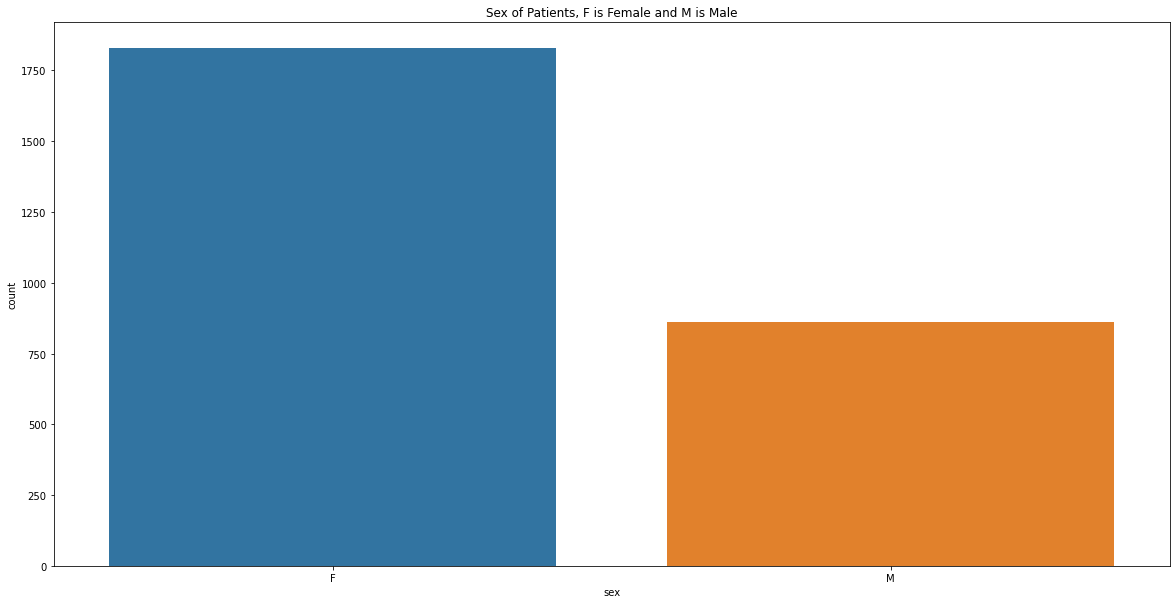

In [43]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients, F is Female and M is Male")

sns.countplot(x='sex',data=df2)